# Kindle Ads A/B Testing 
### *Which ad is more effective....fear-based or knowledge-based?* 
Kindle released two ads 
1. persuasive ad focused on instilling fear in peoples mind about about what will happen to professional career if they dont read regularly.
2. persuasive as focused on long term benefits of reading in one's professional life and how kindle will help with reading.

So which ad led to more purchases? 
Which ad was clicked on more? 
What was the success of each campaign? 

### Defining the features of the Dataset: 
- **Impressions:** # of instances a person saw the ad
- **Clicks:** # of instances a person clicks on the ad
- **Spent:** How much it cost to run the ad (not featured in this data set are the different ad streams like GDN, PPL, etc. )
- **Total Conversion:** Customer took some action that is not observable - browsed site, added to cart, etc.
- **Approved Conversion:** Customer completed transaction (purchased book or kindle service)

In [50]:
#Loading the data
import pandas as pd

file_path = '/Users/mariagarcia/Desktop/Portfolio/AB testing/kindle AB testing dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.9200,5,1
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.0500,3,1
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.4000,3,0
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.0000,1,1
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.3300,3,2


### Creating New Metrics & Caterogization: 
1. **Conversion rates:** number of clicks / impressions
2. **Cost per Conversion:** 
3. **Cost per Click**: 
4. **Cost per thousand impressions:** Spent / 
5. **target cost-per-action (tCPA):** total cost per ad campign per approved conversion
6. **Categorize Ads** 

In [53]:
# 1. Conversion rates: number of clicks / impressions
df['Conversion_Rate'] = df['Clicks'] / df['Impressions']

In [55]:
# 2. Cost per Conversion: Spent / Total_Conversion
df['Cost_per_Conversion'] = df['Spent'] / df['Total_Conversion']

In [57]:
# 3. Cost per Click: Spent / Clicks
df['Cost_per_Click'] = df['Spent'] / df['Clicks']

In [59]:
# 4. Cost per thousand impressions: (Spent / Impressions) * 1000
df['Cost_per_Thousand_Impressions'] = (df['Spent'] / df['Impressions']) * 1000

In [61]:
# 5. Target cost-per-action (tCPA): Spent / Approved_Conversion
df['tCPA'] = df['Spent'] / df['Approved_Conversion']

In [63]:
df['Ad_Type'] = df['campaign_id'].apply(lambda x: 'knowledge-based' if x == 'AKIN9326' else 'fear-based')
df.head()

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion_Rate,Cost_per_Conversion,Cost_per_Click,Cost_per_Thousand_Impressions,tCPA,Ad_Type
0,1121121,AKIN9326,30-34,M,Business & industry,323899,46,78.9200,5,1,0.0001,15.7840,1.7157,0.2437,78.9200,knowledge-based
1,1121091,AKIN9326,30-34,M,Business & industry,1194718,141,254.0500,3,1,0.0001,84.6833,1.8018,0.2126,254.0500,knowledge-based
2,1121092,AKIN9326,30-34,M,Business & industry,637648,67,122.4000,3,0,0.0001,40.8000,1.8269,0.1920,inf,knowledge-based
3,1121094,AKIN9326,30-34,M,Business & industry,24362,0,0.0000,1,1,0.0000,0.0000,NaN,0.0000,0.0000,knowledge-based
4,1121095,AKIN9326,30-34,M,Business & industry,459690,50,86.3300,3,2,0.0001,28.7767,1.7266,0.1878,43.1650,knowledge-based


In [65]:
# Display the calculated metrics
df_metrics = df[['ad_id', 'campaign_id', 'Conversion_Rate', 'Cost_per_Conversion', 'Cost_per_Click', 'Cost_per_Thousand_Impressions', 'tCPA']]
print(df_metrics)

        ad_id campaign_id  Conversion_Rate  Cost_per_Conversion  \
0     1121121    AKIN9326           0.0001              15.7840   
1     1121091    AKIN9326           0.0001              84.6833   
2     1121092    AKIN9326           0.0001              40.8000   
3     1121094    AKIN9326           0.0000               0.0000   
4     1121095    AKIN9326           0.0001              28.7767   
...       ...         ...              ...                  ...   
1245  1314303    AKIN8012           0.0001               6.1010   
1246  1121246    AKIN8012           0.0001               6.7367   
1247  1314393    AKIN8012           0.0002              43.5560   
1248  1121824    AKIN8012           0.0002              18.6730   
1249  1121336    AKIN8012           0.0002              17.4150   

      Cost_per_Click  Cost_per_Thousand_Impressions     tCPA  
0             1.7157                         0.2437  78.9200  
1             1.8018                         0.2126 254.0500  
2     

In [67]:
## Cleaning up invalid data 
# Handle "inf" and "NaN" values:
# Replace inf and -inf with NaN
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Remove rows with NaN values in the calculated metrics
df.dropna(subset=['Conversion_Rate', 'Cost_per_Conversion', 'Cost_per_Click', 
                  'Cost_per_Thousand_Impressions', 'tCPA'], inplace=True)

In [69]:
# Select only the columns of interest for display
df_metrics = df[['ad_id', 'campaign_id', 'Conversion_Rate', 'Cost_per_Conversion', 
                 'Cost_per_Click', 'Cost_per_Thousand_Impressions', 'tCPA']]

# Set display options for better formatting in the console
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format floats to 4 decimal places
pd.set_option('display.max_columns', None)  # Display all columns

# Display the cleaned and formatted DataFrame
print(df_metrics.to_string(index=False))

  ad_id campaign_id  Conversion_Rate Cost_per_Conversion  Cost_per_Click  Cost_per_Thousand_Impressions     tCPA
1121121    AKIN9326           0.0001             15.7840          1.7157                         0.2437  78.9200
1121091    AKIN9326           0.0001             84.6833          1.8018                         0.2126 254.0500
1121095    AKIN9326           0.0001             28.7767          1.7266                         0.1878  43.1650
1121096    AKIN9326           0.0001             80.9550          1.8827                         0.2159 161.9100
1121098    AKIN9326           0.0001             59.1925          1.9250                         0.1868 236.7700
1121100    AKIN9326           0.0001            127.9900          1.8822                         0.2097 639.9500
1121101    AKIN9326           0.0000              0.7950          1.5900                         0.0531   1.5900
1121110    AKIN9326           0.0001             70.1200          1.7102                        

### Understanding the Distrobution of Categorical Data
We have a pretty even split between ages and gender, however more fear based ads were pushed customer interest towards bussiness & industry is significant. Keeping this in mind to account for later, if need be. 

In [72]:
# Count the number of occurrences for each category in 'campaign_id'
campaign_id_counts = df['campaign_id'].value_counts()

# Count the number of occurrences for each category in 'age'
age_counts = df['age'].value_counts()

# Count the number of occurrences for each category in 'gender'
gender_counts = df['gender'].value_counts()

# Count the number of occurrences for each category in 'interest'
interest_counts = df['interest'].value_counts()

# Display the counts
print("Count of Rows by Campaign ID:")
print(campaign_id_counts)
print("\nCount of Rows by Age:")
print(age_counts)
print("\nCount of Rows by Gender:")
print(gender_counts)
print("\nCount of Rows by Interest:")
print(interest_counts)

Count of Rows by Campaign ID:
campaign_id
AKIN9326    293
AKIN8012    177
Name: count, dtype: int64

Count of Rows by Age:
age
30-34    152
45-49    114
35-39    111
40-44     93
Name: count, dtype: int64

Count of Rows by Gender:
gender
F    236
M    234
Name: count, dtype: int64

Count of Rows by Interest:
interest
Business & industry        367
Entertainment (Reading)     52
Entertainment (Games)       51
Name: count, dtype: int64


## Exploratory Analysis: 
1. Group by Ad_Type and calculate mean metrics
2. Group by Ad_Type, age, gender, and interest to find the best performing customer type for each ad
3. Heat map *(spoiler alert - the heat map tells us what we can already infer)*

In [75]:
# 1. Group by Ad_Type and calculate mean metrics
performance_metrics = df.groupby('Ad_Type').agg({
    'Conversion_Rate': 'mean',
    'Cost_per_Conversion': 'mean',
    'Cost_per_Click': 'mean',
    'Cost_per_Thousand_Impressions': 'mean',
    'tCPA': 'mean'
}).reset_index()

print("Performance Metrics by Ad Type:")
print(performance_metrics)

Performance Metrics by Ad Type:
           Ad_Type  Conversion_Rate Cost_per_Conversion  Cost_per_Click  \
0       fear-based           0.0002              8.6484          1.4233   
1  knowledge-based           0.0002             35.6444          1.5775   

   Cost_per_Thousand_Impressions    tCPA  
0                         0.3319 20.2169  
1                         0.2605 83.3890  


In [77]:
# Group by Ad_Type, age, gender, and interest to find the best performing customer type for each ad
customer_performance = df.groupby(['Ad_Type', 'age', 'gender', 'interest']).agg({
    'Conversion_Rate': 'mean',
    'Cost_per_Conversion': 'mean',
    'tCPA': 'mean'
}).reset_index()

print("\nCustomer Performance by Ad Type:")
print(customer_performance)


Customer Performance by Ad Type:
            Ad_Type    age gender                 interest  Conversion_Rate  \
0        fear-based  30-34      F      Business & industry           0.0002   
1        fear-based  30-34      F    Entertainment (Games)           0.0002   
2        fear-based  30-34      M      Business & industry           0.0002   
3        fear-based  30-34      M    Entertainment (Games)           0.0003   
4        fear-based  30-34      M  Entertainment (Reading)           0.0001   
5        fear-based  35-39      F      Business & industry           0.0002   
6        fear-based  35-39      F    Entertainment (Games)           0.0002   
7        fear-based  35-39      M      Business & industry           0.0002   
8        fear-based  35-39      M    Entertainment (Games)           0.0002   
9        fear-based  40-44      F      Business & industry           0.0003   
10       fear-based  40-44      F    Entertainment (Games)           0.0004   
11       fear-base

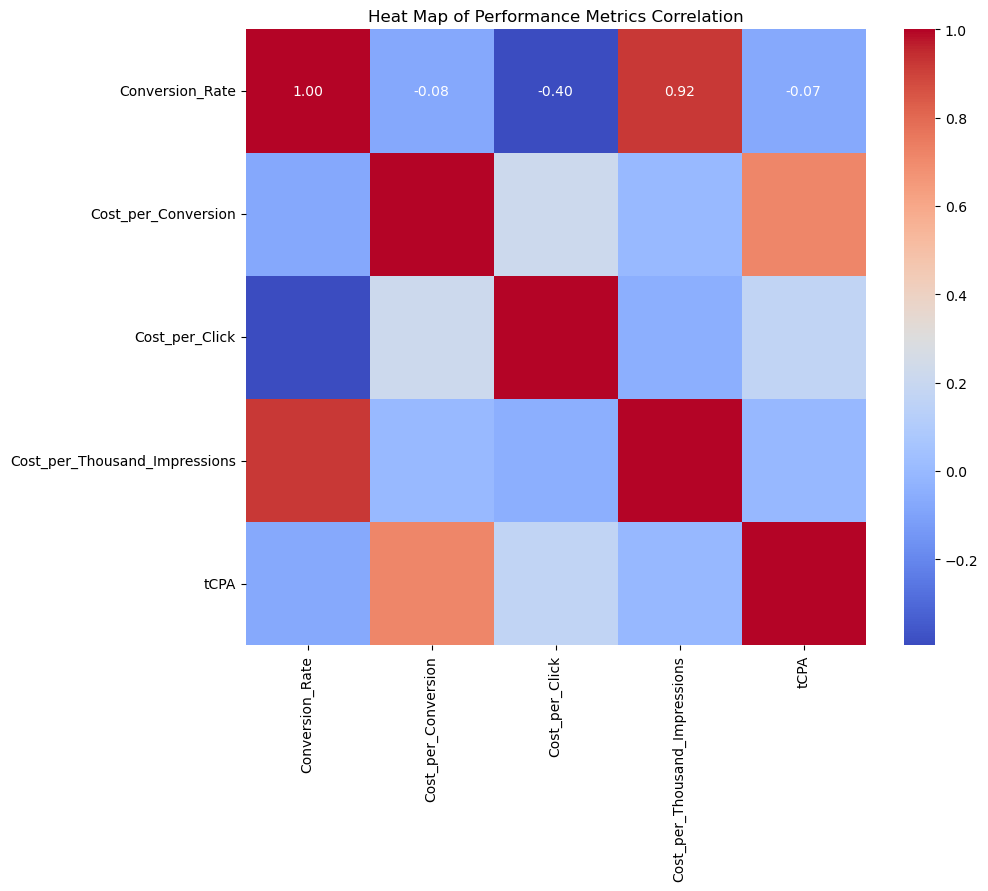

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns
corr_matrix = df[['Conversion_Rate', 'Cost_per_Conversion', 'Cost_per_Click', 
                  'Cost_per_Thousand_Impressions', 'tCPA']].corr()

# 2. Plot the Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 3. Customize the Plot
plt.title('Heat Map of Performance Metrics Correlation')
plt.show()

## Statistical Testing: 
1. Perform t-tests to compare Conversion_Rate between ad types
2. Perform a two-proportion z-test for the conversion rates

In [ ]:
# Perform t-tests to compare Conversion_Rate between ad types
knowledge_based = df[df['Ad_Type'] == 'knowledge-based']['Conversion_Rate']
fear_based = df[df['Ad_Type'] == 'fear-based']['Conversion_Rate']

t_stat, p_value = stats.ttest_ind(knowledge_based, fear_based, equal_var=False)

print("\nT-Test Results:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# If p-value is less than 0.05, the difference is statistically significant
if p_value < 0.05:
    print("The difference in Conversion Rates between the two ad types is statistically significant.")
else:
    print("The difference in Conversion Rates between the two ad types is not statistically significant.")

In [31]:
# Calculate the total number of clicks and impressions for each campaign
campaign_grouped = df.groupby('campaign_id').agg({'Clicks': 'sum', 'Impressions': 'sum'})

In [35]:
# Extract the values
clicks_A = campaign_grouped.loc[df['campaign_id'].unique()[0], 'Clicks']
impressions_A = campaign_grouped.loc[df['campaign_id'].unique()[0], 'Impressions']
clicks_B = campaign_grouped.loc[df['campaign_id'].unique()[1], 'Clicks']
impressions_B = campaign_grouped.loc[df['campaign_id'].unique()[1], 'Impressions']

In [43]:
# Perform z-test
from statsmodels.stats.proportion import proportions_ztest
z_stat, p_val = proportions_ztest([clicks_A, clicks_B], [impressions_A, impressions_B])

In [45]:
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

Z-statistic: -7.572949111121001
P-value: 3.648452539649333e-14


### Results

In [47]:
#Results 
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the two campaigns.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the two campaigns.")

Reject the null hypothesis: There is a significant difference in conversion rates between the two campaigns.
